<center><h1>Train Data Probabilities</h1></center>

<b>Hypothesis: </b>When the Titanic sank and people realized that lifeboats were too few for all passengers, they imposed some preferences for people who can survive, taking into account first the class (Pclass), on second place they would probably prefer a child before an adult (Age), thirdly they would probably prefer women before men (Sex) and the last condition of preference perhaps is that alone passengers survived more than the accompanied passengers (FamMem) Probably because the accompanied passengers gave their place in a lifeboat to any member of their family. This is my hypothesis in this analysis, but what does the data tell us? We will find out.

On this notebook we are going to calculate the survival rate that includes each group of passengers according with our hypothesis. From largest to smallest scale, we will give initial priority to:
    1. Class
    2. Age
    3. Sex
    4. FamMem
But, before beggining, we need show on visualizations our hipothesis validation, and if it is not correct we must change the order about our priority list.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read CSV file and look its columns and rows
df_train = pd.read_csv('train_master_table.csv')
df_train.drop(['Unnamed: 0'], axis = 'columns',inplace = True)
print(df_train.shape)

(712, 7)


In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,FamMem
0,1,0,3,0,1,0,1
1,2,1,1,1,1,1,1
2,3,1,3,1,1,0,0
3,4,1,1,1,1,0,1
4,5,0,3,0,1,0,0


In [4]:
# We adjust our FamMem column to get easiest calculates.
def define_alone(x):
    '''
    Alone == 0
    Accompanied == 1
    '''
    if x == 0:
        return 0
    else:
        return 1
        
df_train['FamMem'] = df_train['FamMem'].apply(lambda x : define_alone(x))

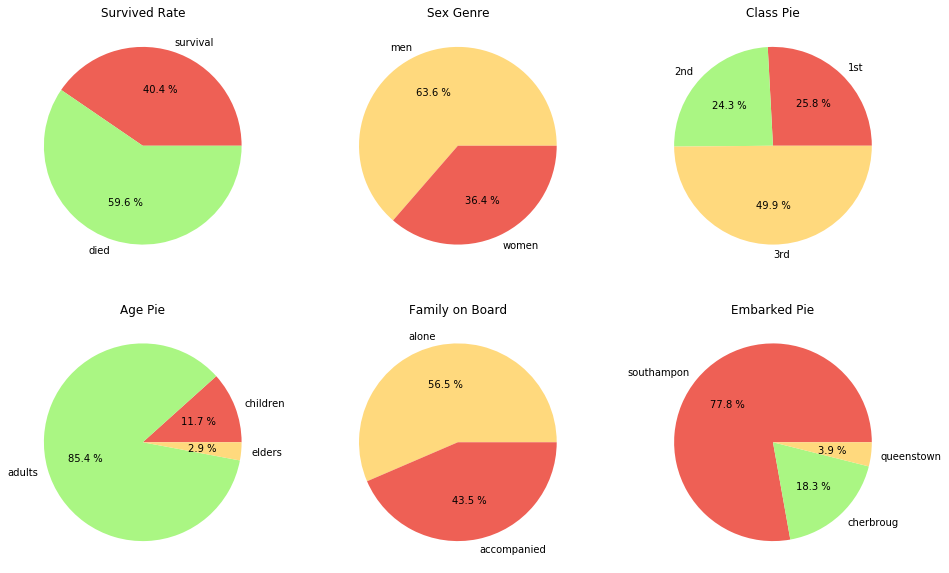

In [5]:
# General visualization of our dataset
total_pass = df_train.count()[0]

total_surv = df_train[df_train['Survived']==1].count()[0]
total_men = df_train[df_train['Sex']==0].count()[0]
total_women = df_train[df_train['Sex']==1].count()[0]
total_alone = df_train[df_train['FamMem']==0].count()[0]
total_accom = df_train[df_train['FamMem']==1].count()[0]

total_1_class = df_train[df_train['Pclass']==1].count()[0]
total_2_class = df_train[df_train['Pclass']==2].count()[0]
total_3_class = df_train[df_train['Pclass']==3].count()[0]

total_children = df_train[df_train['Age']==0].count()[0]
total_adults = df_train[df_train['Age']==1].count()[0]
total_elders = df_train[df_train['Age']==2].count()[0]

total_s_embarked = df_train[df_train['Embarked']==0].count()[0]
total_c_embarked = df_train[df_train['Embarked']==1].count()[0]
total_q_embarked = df_train[df_train['Embarked']==2].count()[0]

plt.figure(figsize=(16, 10))

# Survived Pie
plt.subplot(2,3,1)
surv_pie = [total_surv/total_pass , (total_pass-total_surv)/total_pass]
surv_labels = ['survival', 'died']
colors_surv_pie = ['#EE6055', '#AAF683']

plt.pie(surv_pie, labels = surv_labels, colors = colors_surv_pie, autopct = '%0.1f %%')
plt.title('Survived Rate')

# Sex Genre Pie
plt.subplot(2,3,2)
sex_gen_pie = [total_men/total_pass , total_women/total_pass]
sex_gen_labels = ['men', 'women']
colors_sex_pie = ['#FFD97D', '#EE6055']

plt.pie(sex_gen_pie, labels = sex_gen_labels, colors = colors_sex_pie, autopct = '%0.1f %%')
plt.title('Sex Genre')

# Class Pie
plt.subplot(2,3,3)
class_pie = [total_1_class/total_pass , total_2_class/total_pass, total_3_class/total_pass]
class_labels = ['1st', '2nd', '3rd']
colors_class_pie = ['#EE6055', '#AAF683', '#FFD97D']

plt.pie(class_pie, labels = class_labels, colors = colors_class_pie, autopct = '%0.1f %%')
plt.title('Class Pie')

# Age Pie
plt.subplot(2,3,4)
age_pie = [total_children/total_pass , total_adults/total_pass, total_elders/total_pass]
age_labels = ['children', 'adults', 'elders']
colors_age_pie = ['#EE6055', '#AAF683', '#FFD97D']

plt.pie(age_pie, labels = age_labels, colors = colors_age_pie, autopct = '%0.1f %%')
plt.title('Age Pie')

# Family on Board Pie
plt.subplot(2,3,5)
fam_pie = [total_alone/total_pass , total_accom/total_pass]
fam_labels = ['alone', 'accompanied']
colors_fam_pie = ['#FFD97D', '#EE6055']

plt.pie(fam_pie, labels = fam_labels, colors = colors_fam_pie, autopct = '%0.1f %%')
plt.title('Family on Board')

# Port of Embarked Pie
plt.subplot(2,3,6)
embarked_pie = [total_s_embarked/total_pass , total_c_embarked/total_pass, total_q_embarked/total_pass]
embarked_labels = ['southampon', 'cherbroug', 'queenstown']
colors_embarked_pie = ['#EE6055', '#AAF683', '#FFD97D']

plt.pie(embarked_pie, labels = embarked_labels, colors = colors_embarked_pie, autopct = '%0.1f %%')
plt.title('Embarked Pie')

plt.show()

<br><b>Validation: </b>With the aim to validate our hypothesis we can biuld a heater map who contains on x axis the survival options (0 to died or 1 to survived) and on y axis all subdivisions on our dataset. This graph is going to allow us visualize the highest survival rates.  

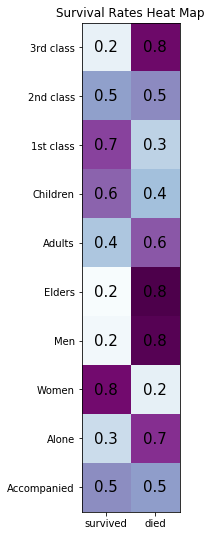

In [6]:
# Show the survival rate per class and survival rate for age on a unique heater map
surv_rate_1_class = (df_train[(df_train['Pclass']==1) & (df_train['Survived']==1)].count()[0])/total_1_class
surv_rate_2_class = (df_train[(df_train['Pclass']==2) & (df_train['Survived']==1)].count()[0])/total_2_class
surv_rate_3_class = (df_train[(df_train['Pclass']==3) & (df_train['Survived']==1)].count()[0])/total_3_class
surv_rate_children = (df_train[(df_train['Age']==0) & (df_train['Survived']==1)].count()[0])/total_children
surv_rate_adults = (df_train[(df_train['Age']==1) & (df_train['Survived']==1)].count()[0])/total_adults
surv_rate_elders = (df_train[(df_train['Age']==2) & (df_train['Survived']==1)].count()[0])/total_elders
surv_rate_men = (df_train[(df_train['Sex']==0) & (df_train['Survived']==1)].count()[0])/total_men
surv_rate_women = (df_train[(df_train['Sex']==1) & (df_train['Survived']==1)].count()[0])/total_women
surv_rate_alone = (df_train[(df_train['FamMem']==0) & (df_train['Survived']==1)].count()[0])/total_alone
surv_rate_accom = (df_train[(df_train['FamMem']==1) & (df_train['Survived']==1)].count()[0])/total_accom

# Array design for our heat map
survived = ['survived', 'died']
clasifications = ['3rd class', '2nd class', '1st class', 'Children', 'Adults', 'Elders', 'Men', 'Women', 'Alone', 'Accompanied'] 

percentage = np.array([[surv_rate_3_class, 1-surv_rate_3_class],
                       [surv_rate_2_class, 1-surv_rate_2_class],
                       [surv_rate_1_class, 1-surv_rate_1_class],
                       [surv_rate_children, 1-surv_rate_children],
                       [surv_rate_adults, 1-surv_rate_adults],
                       [surv_rate_elders, 1-surv_rate_elders],
                       [surv_rate_men, 1-surv_rate_men],
                       [surv_rate_women, 1-surv_rate_women],
                       [surv_rate_alone, 1-surv_rate_alone],
                       [surv_rate_accom, 1-surv_rate_accom]])

# Heat map configuration
fig, ax = plt.subplots(figsize=(15,9))
im = ax.imshow(percentage, cmap="BuPu")

ax.set_xticks(np.arange(len(survived)))
ax.set_xticklabels(survived)
ax.set_yticks(np.arange(len(clasifications)))
ax.set_yticklabels(clasifications)

# Loop over data dimensions and create text annotations.
for i in range(len(clasifications)):
    for j in range(len(survived)):
        text = ax.text(j, i, round(percentage[i, j], 1),
                       ha="center", va="center", color="k", size=15)
        
ax.set_title('Survival Rates Heat Map')
plt.show()

<b>Class Observations: </b>Look the difference between 1st class survival rate and 3rd class rate. First class Survived rate is little less than the rate of 3rd class passengers who losed their lives. And the second class are indifferent, a half of passengers died and the other half survived.
<br><b>Age Observations: </b>The difference between children and adults rate is not big, but the elders rate is the lowest. Eight of each ten elder passengers losed the live.
<br><b>Sex Genre Observations: </b>It's notorious that women lived more than men.
<br><b>Family On Board Observations: </b>If passengers embarked alone had more probability to died than passengers with family on board.
<br>
<br>So the new priority list must be this one:
    1. Sex
    2. Class
    3. Age
    4. FamMem

In [7]:
# Probabilities according our four priority stages
sex_list = [0, 1]
class_list = [1, 2, 3]
age_list = [0, 1, 2]
fam_list = [0, 1]

In [8]:
def surv_rate(sex_opt, class_opt, age_opt, comp_opt):
    '''
    Function that gets the stage condition
    to compute all probabilities for each one
    and return a dictionary with all these
    '''
    rate_dict = {}
    
    # Survival Rate per Sex
    if class_opt == 203:   
        sex_rate = []
        for i in sex_opt:
            surv = df_train[(df_train['Sex']== i) & (df_train['Survived']==1)].count()[0]
            total = df_train[df_train['Sex']== i].count()[0]
            rate = surv/total
            sex_rate.append(rate)
        rate_dict['Men Rate'] = sex_rate[0]
        rate_dict['Women Rate'] = sex_rate[1]
        return rate_dict
    
    # Survival Rate per Sex & Class
    elif age_opt == 203:   
        class_rate = []
        for i in sex_opt:
            for j in class_opt:
                surv = df_train[(df_train['Sex']== i)& (df_train['Pclass']== j) & (df_train['Survived']==1)].count()[0]
                total = df_train[(df_train['Sex']== i) & (df_train['Pclass']== j)].count()[0]
                rate = surv/total
                class_rate.append(rate)
        rate_dict['1st Class Men'] = class_rate[0]
        rate_dict['2nd Class Men'] = class_rate[1]
        rate_dict['3rd Class Men'] = class_rate[2]
        rate_dict['1st Class Women'] = class_rate[3]
        rate_dict['2nd Class Women'] = class_rate[4]
        rate_dict['3rd Class Women'] = class_rate[5]
        return rate_dict
    
    # Survival Rate per Sex & Class & Age
    elif comp_opt == 203:   
        age_rate = []
        for i in sex_opt:
            for j in class_opt:
                for k in age_opt:
                    surv = df_train[(df_train['Sex']== i)& (df_train['Pclass']== j) & (df_train['Age']== k) & (df_train['Survived']==1)].count()[0]
                    total = df_train[(df_train['Sex']== i) & (df_train['Pclass']== j) & (df_train['Age']== k)].count()[0]
                    if total != 0:
                        rate = surv/total
                        age_rate.append(rate)
                    else:
                        surv = df_train[(df_train['Sex']== i)& (df_train['Pclass']== j) & (df_train['Survived']==1)].count()[0]
                        total = df_train[(df_train['Sex']== i) & (df_train['Pclass']== j)].count()[0]
                        rate = surv/total
                        age_rate.append(rate)
        rate_dict['1st Class Men Children'] = age_rate[0]
        rate_dict['1st Class Men Adults'] = age_rate[1]
        rate_dict['1st Class Men Elders'] = age_rate[2]
        rate_dict['2nd Class Men Children'] = age_rate[3]
        rate_dict['2nd Class Men Adults'] = age_rate[4]
        rate_dict['2nd Class Men Elders'] = age_rate[5]
        rate_dict['3rd Class Men Children'] = age_rate[6]
        rate_dict['3rd Class Men Adults'] = age_rate[7]
        rate_dict['3rd Class Men Elders'] = age_rate[8]
        
        rate_dict['1st Class Women Children'] = age_rate[9]
        rate_dict['1st Class Women Adults'] = age_rate[10]
        rate_dict['1st Class Women Elders'] = age_rate[11]
        rate_dict['2nd Class Women Children'] = age_rate[12]
        rate_dict['2nd Class Women Adults'] = age_rate[13]
        rate_dict['2nd Class Women Elders'] = age_rate[14]
        rate_dict['3rd Class Women Children'] = age_rate[15]
        rate_dict['3rd Class Women Adults'] = age_rate[16]
        rate_dict['3rd Class Women Elders'] = age_rate[17]
        
    # Survival Rate per Sex & Class & Age & FamMem
    else:   
        famMem_rate = []
        for i in sex_opt:
            for j in class_opt:
                for k in age_opt:
                    for l in comp_opt:
                        surv = df_train[(df_train['Sex']== i)& (df_train['Pclass']== j) & (df_train['Age']== k) & (df_train['FamMem']== l) & (df_train['Survived']==1)].count()[0]
                        total = df_train[(df_train['Sex']== i) & (df_train['Pclass']== j) & (df_train['Age']== k) & (df_train['FamMem']== l)].count()[0]
                        if total != 0:
                            rate = surv/total
                            famMem_rate.append(rate)
                        else:
                            surv = df_train[(df_train['Sex']== i)& (df_train['Pclass']== j) & (df_train['Survived']==1)].count()[0]
                            total = df_train[(df_train['Sex']== i) & (df_train['Pclass']== j)].count()[0]
                            rate = surv/total
                            famMem_rate.append(rate)
        rate_dict['1st Class Men Children Alone'] = famMem_rate[0]
        rate_dict['1st Class Men Children FamMem'] = famMem_rate[1]
        rate_dict['1st Class Men Adults Alone'] = famMem_rate[2]
        rate_dict['1st Class Men Adults FamMem'] = famMem_rate[3]
        rate_dict['1st Class Men Elders Alone'] = famMem_rate[4]
        rate_dict['1st Class Men Elders FamMem'] = famMem_rate[5]
        
        rate_dict['2nd Class Men Children Alone'] = famMem_rate[6]
        rate_dict['2nd Class Men Children FamMem'] = famMem_rate[7]
        rate_dict['2nd Class Men Adults Alone'] = famMem_rate[8]
        rate_dict['2nd Class Men Adults FamMem'] = famMem_rate[9]
        rate_dict['2nd Class Men Elders Alone'] = famMem_rate[10]
        rate_dict['2nd Class Men Elders FamMem'] = famMem_rate[11]
        
        rate_dict['3rd Class Men Children Alone'] = famMem_rate[12]
        rate_dict['3rd Class Men Children FamMem'] = famMem_rate[13]
        rate_dict['3rd Class Men Adults Alone'] = famMem_rate[14]
        rate_dict['3rd Class Men Adults FamMem'] = famMem_rate[15]
        rate_dict['3rd Class Men Elders Alone'] = famMem_rate[16]
        rate_dict['3rd Class Men Elders FamMem'] = famMem_rate[17]
        
        rate_dict['1st Class Women Children Alone'] = famMem_rate[18]
        rate_dict['1st Class Women Children FamMem'] = famMem_rate[19]
        rate_dict['1st Class Women Adults Alone'] = famMem_rate[20]
        rate_dict['1st Class Women Adults FamMem'] = famMem_rate[21]
        rate_dict['1st Class Women Elders Alone'] = famMem_rate[22]
        rate_dict['1st Class Women Elders FamMem'] = famMem_rate[23]
        
        rate_dict['2nd Class Women Children Alone'] = famMem_rate[24]
        rate_dict['2nd Class Women Children FamMem'] = famMem_rate[25]
        rate_dict['2nd Class Women Adults Alone'] = famMem_rate[26]
        rate_dict['2nd Class Women Adults FamMem'] = famMem_rate[27]
        rate_dict['2nd Class Women Elders Alone'] = famMem_rate[28]
        rate_dict['2nd Class Women Elders FamMem'] = famMem_rate[29]
        
        rate_dict['3rd Class Women Children Alone'] = famMem_rate[30]
        rate_dict['3rd Class Women Children FamMem'] = famMem_rate[31]
        rate_dict['3rd Class Women Adults Alone'] = famMem_rate[32]
        rate_dict['3rd Class Women Adults FamMem'] = famMem_rate[33]
        rate_dict['3rd Class Women Elders Alone'] = famMem_rate[34]
        rate_dict['3rd Class Women Elders FamMem'] = famMem_rate[35]


    return rate_dict

In [9]:
def stage_sel(stage_opt):
    '''
    According to the stage sended from
    get_dicts, this function call to
    surv_rate function for compute all
    probabilities per each stage
    '''
    
    if stage_opt == 0:    
        sex_opt = sex_list
        class_opt = 203
        age_opt = 203
        comp_opt = 203
        response = surv_rate(sex_opt, class_opt, age_opt, comp_opt)
        return response
        
    elif stage_opt == 1:    
        sex_opt = sex_list
        class_opt = class_list
        age_opt = 203
        comp_opt = 203
        response = surv_rate(sex_opt, class_opt, age_opt, comp_opt)
        return response
    
    elif stage_opt == 2:    
        sex_opt = sex_list
        class_opt = class_list
        age_opt = age_list
        comp_opt = 203
        response = surv_rate(sex_opt, class_opt, age_opt, comp_opt)
        return response
    
    elif stage_opt == 3:    
        sex_opt = sex_list
        class_opt = class_list
        age_opt = age_list
        comp_opt = fam_list
        response = surv_rate(sex_opt, class_opt, age_opt, comp_opt)
        return response
    
    else:
        return None

In [10]:
def get_dicts():
    '''
    Command Function that call to stage_sel
    function according to the stage computing
    '''
    stages_dict = {}
    stages_dict['0 Stage'] = stage_sel(0)
    stages_dict['1 Stage'] = stage_sel(1)
    stages_dict['2 Stage'] = stage_sel(2)
    stages_dict['3 Stage'] = stage_sel(3)
    
    return stages_dict

In [11]:
# Finally we can get all probabilities on one big dictionary
big_dict = get_dicts()

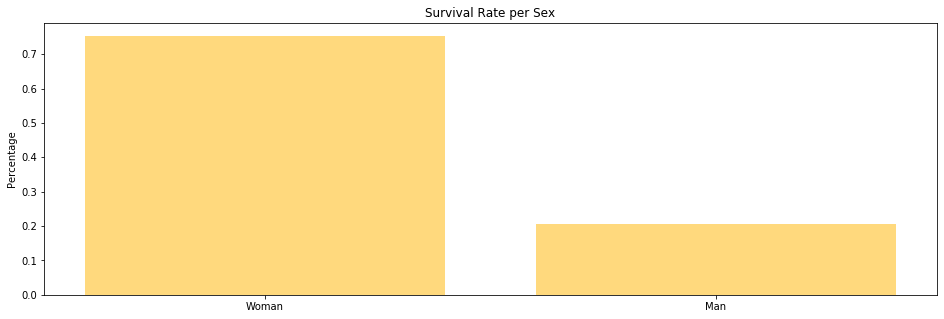

In [12]:
# Survival Rate per Sex
surv_rate_women = big_dict['0 Stage']['Women Rate']
surv_rate_men = big_dict['0 Stage']['Men Rate']

plt.figure(figsize=(16, 5))
plt.bar(['Woman', 'Man'], [surv_rate_women , surv_rate_men], color='#FFD97D')
plt.ylabel('Percentage')
plt.title('Survival Rate per Sex')

plt.show()

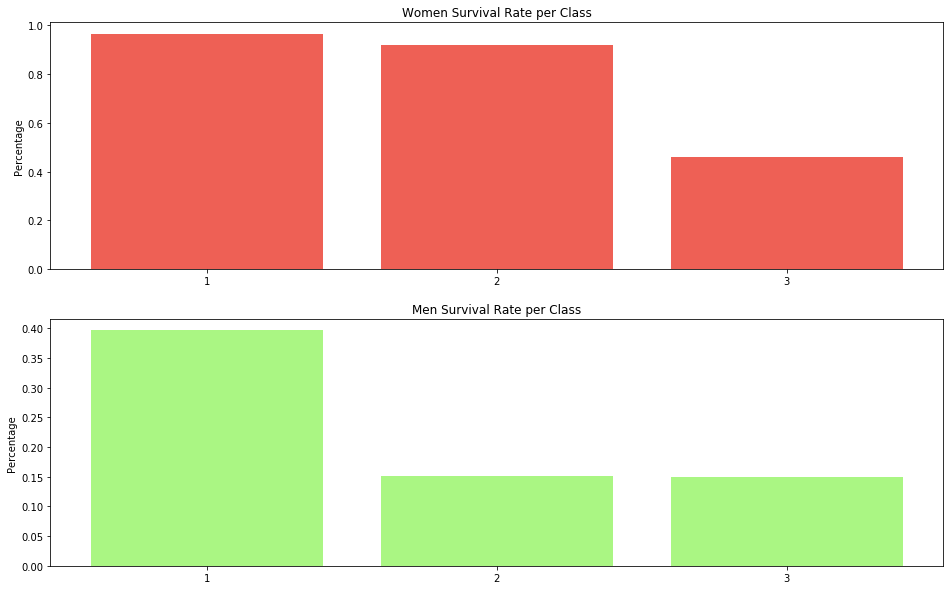

In [13]:
# Survival Rate per Sex & Age
surv_rate_women_1_class = big_dict['1 Stage']['1st Class Women']
surv_rate_women_2_class = big_dict['1 Stage']['2nd Class Women']
surv_rate_women_3_class = big_dict['1 Stage']['3rd Class Women']
surv_rate_men_1_class = big_dict['1 Stage']['1st Class Men']
surv_rate_men_2_class = big_dict['1 Stage']['2nd Class Men']
surv_rate_men_3_class = big_dict['1 Stage']['3rd Class Men']

plt.figure(figsize=(16, 10))
# Women subplot 
plt.subplot(2,1,1)
plt.bar(['1', '2', '3'], [surv_rate_women_1_class, surv_rate_women_2_class, surv_rate_women_3_class ], color='#EE6055')
plt.ylabel('Percentage')
plt.title('Women Survival Rate per Class')

# Men subplot 
plt.subplot(2,1,2)
plt.bar(['1', '2', '3'], [surv_rate_men_1_class, surv_rate_men_2_class, surv_rate_men_3_class ], color='#AAF683')
plt.ylabel('Percentage')
plt.title('Men Survival Rate per Class')

plt.show()

In [14]:
big_dict['2 Stage']['1st Class Women Elders']

1.0

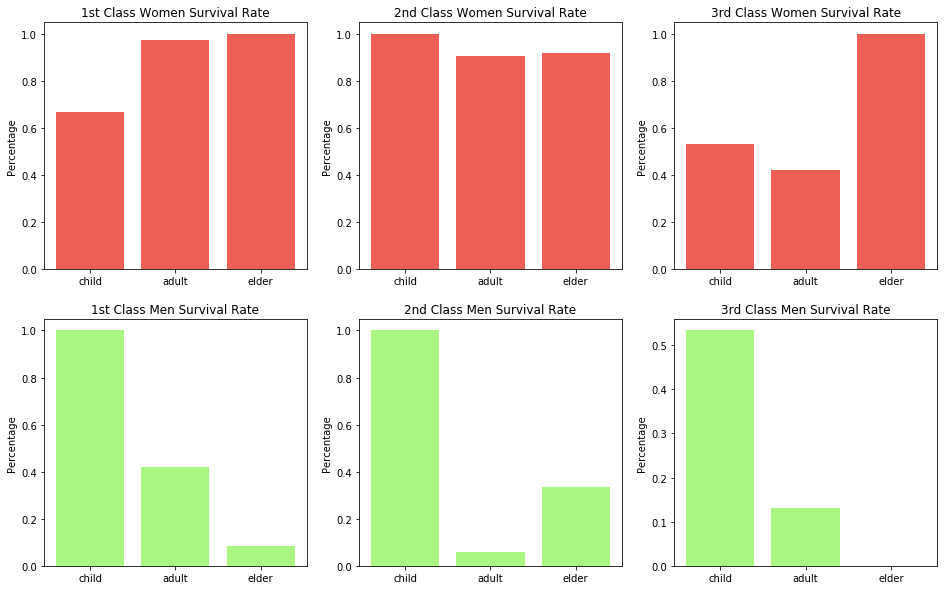

In [15]:
# Survival Rate per Sex & Class & Age
surv_rate_women_1_class_children = big_dict['2 Stage']['1st Class Women Children']
surv_rate_women_1_class_adults = big_dict['2 Stage']['1st Class Women Adults']
surv_rate_women_1_class_elders = big_dict['2 Stage']['1st Class Women Elders']
surv_rate_women_2_class_children = big_dict['2 Stage']['2nd Class Women Children']
surv_rate_women_2_class_adults = big_dict['2 Stage']['2nd Class Women Adults']
surv_rate_women_2_class_elders = big_dict['2 Stage']['2nd Class Women Elders']
surv_rate_women_3_class_children = big_dict['2 Stage']['3rd Class Women Children']
surv_rate_women_3_class_adults = big_dict['2 Stage']['3rd Class Women Adults']
surv_rate_women_3_class_elders = big_dict['2 Stage']['3rd Class Women Elders']
surv_rate_men_1_class_children = big_dict['2 Stage']['1st Class Men Children']
surv_rate_men_1_class_adults = big_dict['2 Stage']['1st Class Men Adults']
surv_rate_men_1_class_elders = big_dict['2 Stage']['1st Class Men Elders']
surv_rate_men_2_class_children = big_dict['2 Stage']['2nd Class Men Children']
surv_rate_men_2_class_adults = big_dict['2 Stage']['2nd Class Men Adults']
surv_rate_men_2_class_elders = big_dict['2 Stage']['2nd Class Men Elders']
surv_rate_men_3_class_children = big_dict['2 Stage']['3rd Class Women Children']
surv_rate_men_3_class_adults = big_dict['2 Stage']['3rd Class Men Adults']
surv_rate_men_3_class_elders = big_dict['2 Stage']['3rd Class Men Elders']

plt.figure(figsize=(16, 10))
age_classif = ['child','adult','elder']

# Women 1st class subplot 
plt.subplot(2,3,1)
y1_w = [surv_rate_women_1_class_children,surv_rate_women_1_class_adults,surv_rate_women_1_class_elders]
plt.bar(age_classif, y1_w,color='#EE6055')
plt.ylabel('Percentage')
plt.title('1st Class Women Survival Rate')

# Women 2nd class subplot 
plt.subplot(2,3,2)
y2_w = [surv_rate_women_2_class_children,surv_rate_women_2_class_adults,surv_rate_women_2_class_elders]
plt.bar(age_classif, y2_w,color='#EE6055')
plt.ylabel('Percentage')
plt.title('2nd Class Women Survival Rate')

# Women 3rd class subplot 
plt.subplot(2,3,3)
y3_w = [surv_rate_women_3_class_children,surv_rate_women_3_class_adults,surv_rate_women_3_class_elders]
plt.bar(age_classif, y3_w,color='#EE6055')
plt.ylabel('Percentage')
plt.title('3rd Class Women Survival Rate')

# Men 1st class subplot 
plt.subplot(2,3,4)
y1_m = [surv_rate_men_1_class_children,surv_rate_men_1_class_adults,surv_rate_men_1_class_elders]
plt.bar(age_classif, y1_m,color='#AAF683')
plt.ylabel('Percentage')
plt.title('1st Class Men Survival Rate')

# Men 2nd class subplot 
plt.subplot(2,3,5)
y2_m = [surv_rate_men_2_class_children,surv_rate_men_2_class_adults,surv_rate_men_2_class_elders]
plt.bar(age_classif, y2_m,color='#AAF683')
plt.ylabel('Percentage')
plt.title('2nd Class Men Survival Rate')

# Men 3rd class subplot 
plt.subplot(2,3,6)
y3_m = [surv_rate_men_3_class_children,surv_rate_men_3_class_adults,surv_rate_men_3_class_elders]
plt.bar(age_classif, y3_m,color='#AAF683')
plt.ylabel('Percentage')
plt.title('3rd Class Men Survival Rate')

plt.show()

In [16]:
# Print all probabilities per stage
stage_keys = list(big_dict.keys())
for i in stage_keys:
    print('--'*10, i, '--'*10)
    for j in list(big_dict[i]):
        print(f'Survival rate for a {j}: {round(big_dict[i][j],4)}')        

-------------------- 0 Stage --------------------
Survival rate for a Men Rate: 0.2053
Survival rate for a Women Rate: 0.7529
-------------------- 1 Stage --------------------
Survival rate for a 1st Class Men: 0.396
Survival rate for a 2nd Class Men: 0.1515
Survival rate for a 3rd Class Men: 0.1502
Survival rate for a 1st Class Women: 0.9639
Survival rate for a 2nd Class Women: 0.9189
Survival rate for a 3rd Class Women: 0.4608
-------------------- 2 Stage --------------------
Survival rate for a 1st Class Men Children: 1.0
Survival rate for a 1st Class Men Adults: 0.4186
Survival rate for a 1st Class Men Elders: 0.0833
Survival rate for a 2nd Class Men Children: 1.0
Survival rate for a 2nd Class Men Adults: 0.0575
Survival rate for a 2nd Class Men Elders: 0.3333
Survival rate for a 3rd Class Men Children: 0.3214
Survival rate for a 3rd Class Men Adults: 0.1312
Survival rate for a 3rd Class Men Elders: 0.0
Survival rate for a 1st Class Women Children: 0.6667
Survival rate for a 1st Cl

In [17]:
# Design a two columns Data Frame for send to predictive analysis stage
prob_df = pd.DataFrame(data=big_dict)
prob_df.to_csv('./train_prob_table.csv')